# Project Overview

This project involves a classification problem where the objective is to predict the values in the "group" column, which can either be "control" or "patient." The dataset includes the following columns: "rownames," "subject," "age," and "group."

rownames: A unique identifier for each record in the dataset, often used as an index.

subject: Represents the identifier or label for the individuals or entities being studied.

age: Indicates the age of the subjects in the dataset.

group: The target variable for the classification problem, categorizing each subject as either "control" or "patient."

# Data Understanding

Loading and Inspecting the Dataset

In [1]:
import pandas as pd

# Raw URL to the Blackmore.csv file
raw_url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/carData/Blackmore.csv"

# Load the CSV directly into pandas
data = pd.read_csv(raw_url)
print(data.head())

   rownames subject    age  exercise    group
0         1     100   8.00      2.71  patient
1         2     100  10.00      1.94  patient
2         3     100  12.00      2.36  patient
3         4     100  14.00      1.54  patient
4         5     100  15.92      8.63  patient


In [2]:
#display the first 5 rows of our dataset
data.head()

,rownames,subject,age,exercise,group
0,1,100,8.00,2.71,patient
1,2,100,10.00,1.94,patient
2,3,100,12.00,2.36,patient
3,4,100,14.00,1.54,patient
4,5,100,15.92,8.63,patient


In [3]:
#display the last 5 rows of our dataset
data.tail()

,rownames,subject,age,exercise,group
940,768,286,8.0,1.10,control
941,769,286,10.0,1.10,control
942,770,286,12.0,0.35,control
943,771,286,14.0,0.40,control
944,772,286,17.0,0.29,control


In [4]:
#display information about our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  945 non-null    int64  
 1   subject   945 non-null    object 
 2   age       945 non-null    float64
 3   exercise  945 non-null    float64
 4   group     945 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 37.0+ KB


In [5]:
#display number of rows and columns in our dataset. 
#there are 945 rows and 5 columns
data.shape

(945, 5)

In [6]:
#display a statistical summary of our dataset
data.describe()

,rownames,age,exercise
count,945.000000,945.000000,945.000000
mean,473.000000,11.441661,2.530646
std,272.942302,2.765609,3.495086
min,1.000000,8.000000,0.000000
25%,237.000000,10.000000,0.400000
50%,473.000000,12.000000,1.330000
75%,709.000000,14.000000,3.040000
max,945.000000,17.920000,29.960000


In [7]:
#display the columns in or dataset
data.columns

Index(['rownames', 'subject', 'age', 'exercise', 'group'], dtype='object')

Column names description;


rownames: A unique identifier for each record in the dataset, often used as an index.

subject: Represents the identifier or label for the individuals or entities being studied.

age: Indicates the age of the subjects in the dataset.

group: The target variable for the classification problem, categorizing each subject as either "control" or "patient."

In [9]:
#display the datatypes for each column
data.dtypes

rownames      int64
subject      object
age         float64
exercise    float64
group        object
dtype: object

# Data Cleaning

## Check for missing values

In [10]:
#check for missing values
data.isnull().sum()

rownames    0
subject     0
age         0
exercise    0
group       0
dtype: int64

From our observation above, our dataset does not have any missing values.

In [11]:
#checking if our dataset has any duplicates
data.duplicated().sum()

0

Our dataset does not have any duplicated values. It is neccessary to check for duplicates to ensure our dataset is clean and avoid any misleading information

## Check for Outliers

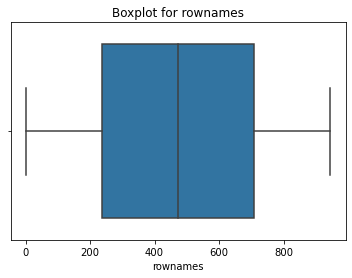

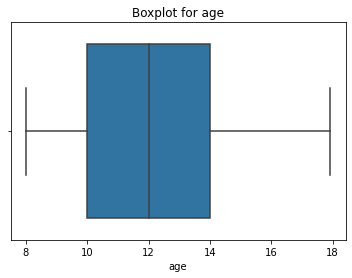

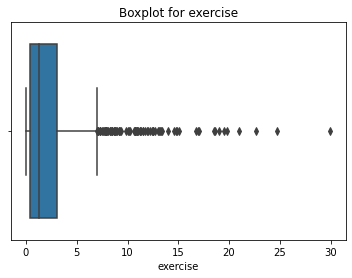

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in data.select_dtypes(include=['float64', 'int64']).columns:
    sns.boxplot(data=data, x=column)
    plt.title(f'Boxplot for {column}')
    plt.show()

The 'exercise' column seems to have outliers, and if not dealth with, it can lead to misinterpretation of results

Calculate the interquartile range (to define and identify outliers in the exercise

In [13]:
import pandas as pd

# Calculate IQR
Q1 = data['exercise'].quantile(0.25)  # 25th percentile
Q3 = data['exercise'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['exercise'] < lower_bound) | (data['exercise'] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")


Number of outliers: 83


Our dataset only has 83 outliers. Removing the outliers will not significantly affect our dataset

In [14]:
data_cleaned = data[(data['exercise'] >= lower_bound) & (data['exercise'] <= upper_bound)]
print(f"Dataframe size after removing outliers: {data_cleaned.shape}")


Dataframe size after removing outliers: (862, 5)


The shape of our dataset changes after removing the 83 outliers

The number of rows changes from 945 to 862

The number of columns remains the same

In [15]:
#checking the number of outliers after remmoving the outliers
outliers_after_removal = data_cleaned[(data_cleaned['exercise'] < lower_bound) | (data_cleaned['exercise'] > upper_bound)]
print(f"Number of outliers after removal: {outliers_after_removal.shape[0]}")


Number of outliers after removal: 0


In [16]:
# Display the DataFrame without the index in the output
print(data.head().to_string(index=True))

   rownames subject    age  exercise    group
0         1     100   8.00      2.71  patient
1         2     100  10.00      1.94  patient
2         3     100  12.00      2.36  patient
3         4     100  14.00      1.54  patient
4         5     100  15.92      8.63  patient


In [18]:
#set rownames to index
data.set_index('rownames', inplace=True)

In [19]:
data.head()

,subject,age,exercise,group
rownames,,,,
1,100,8.00,2.71,patient
2,100,10.00,1.94,patient
3,100,12.00,2.36,patient
4,100,14.00,1.54,patient
5,100,15.92,8.63,patient
